In [1]:
from google.colab import files
uploaded = files.upload()

Saving job_change_data.csv to job_change_data.csv


In [2]:
from google.colab import files
uploaded = files.upload()

Saving students_performance_records.xlsx to students_performance_records.xlsx


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
students_df = pd.read_excel('students_performance_records.xlsx')

# Load the CSV file
hr_df = pd.read_csv('job_change_data.csv')

In [4]:
# Check missing values
students_df.info()

# Fill or drop missing values as needed (simple handling)
students_df = students_df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2390 non-null   object 
 3   Ethnicity          2391 non-null   object 
 4   ParentalEducation  2391 non-null   object 
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   object 
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   int64  
dtypes: float64(2), int64(9), object(4)
memory usage: 280.4+ KB


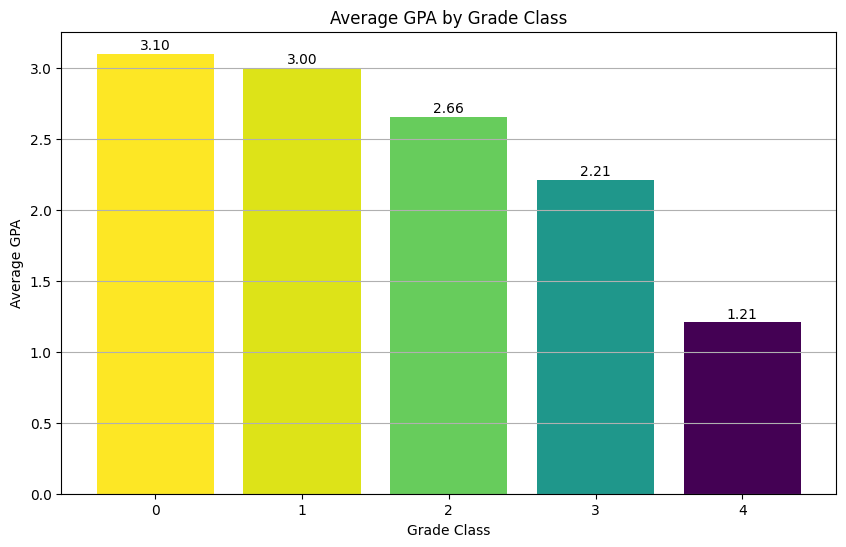

In [5]:
# Group and calculate mean GPA by GradeClass
avg_gpa = students_df.groupby('GradeClass')['GPA'].mean().sort_values()

# Bar plot with color map
plt.figure(figsize=(10,6))
colors = plt.cm.viridis((avg_gpa - avg_gpa.min()) / (avg_gpa.max() - avg_gpa.min()))
bars = plt.bar(avg_gpa.index, avg_gpa.values, color=colors)

# Annotate values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.title('Average GPA by Grade Class')
plt.xlabel('Grade Class')
plt.ylabel('Average GPA')
plt.grid(axis='y')
plt.show()

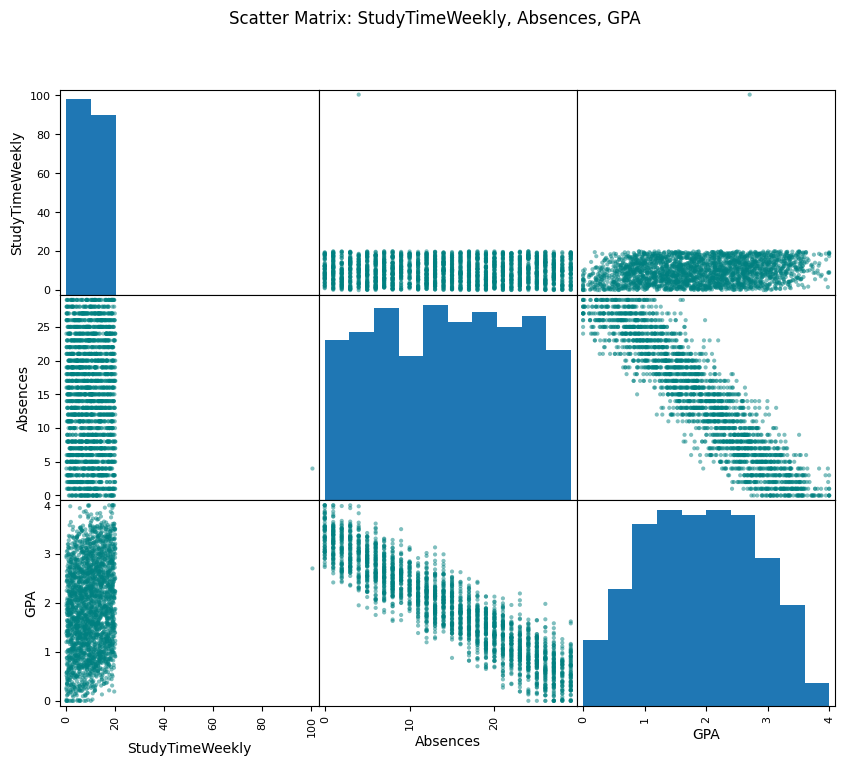

In [6]:
from pandas.plotting import scatter_matrix

# Select variables
vars_to_plot = ['StudyTimeWeekly', 'Absences', 'GPA']
scatter_matrix(students_df[vars_to_plot], figsize=(10, 8), diagonal='hist', color='teal')

plt.suptitle('Scatter Matrix: StudyTimeWeekly, Absences, GPA')
plt.show()

<ipython-input-7-1878043336>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=students_df, x='GradeClass', y='StudyTimeWeekly', palette='Set2')


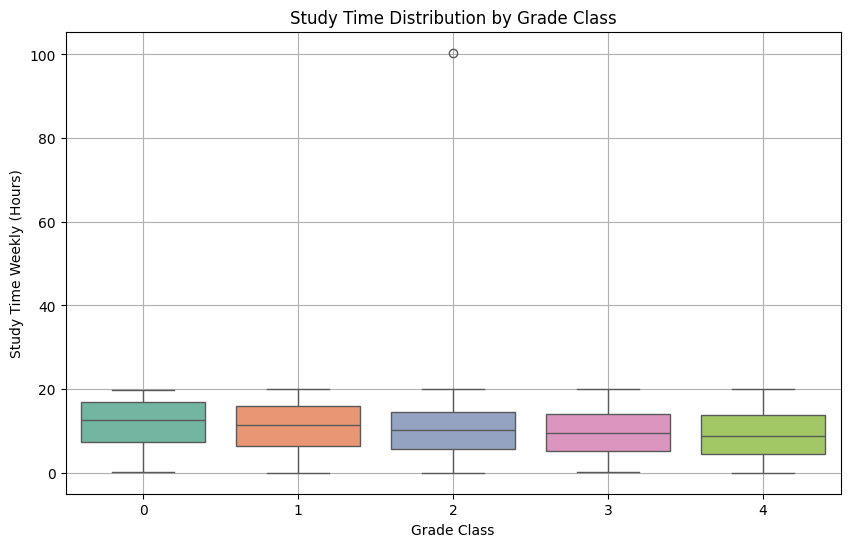

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=students_df, x='GradeClass', y='StudyTimeWeekly', palette='Set2')

plt.title('Study Time Distribution by Grade Class')
plt.xlabel('Grade Class')
plt.ylabel('Study Time Weekly (Hours)')
plt.grid(True)
plt.show()